# Проект принятие решений в бизнесе

## Тех. задание

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

###### Данные для 1 части


 * Hypothesis — краткое описание гипотезы;
 * Reach — охват пользователей по 10-балльной шкале;
 * Impact — влияние на пользователей по 10-балльной шкале;
 * Confidence — уверенность в гипотезе по 10-балльной шкале;
 * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

###### Данные для 2 части


 * transactionId — идентификатор заказа;
 * visitorId — идентификатор пользователя, совершившего заказ;
 * date — дата, когда был совершён заказ;
 * revenue — выручка заказа;
 * group — группа A/B-теста, в которую попал заказ.  


 * date — дата;
 * group — группа A/B-теста;
 * visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Декомпозиция
### Часть 1. Приоритизация гипотез

 * Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
 * Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
 * Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Часть 2. Анализ А/В теста

 * Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
 * Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
 * Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
 * Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
 * Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
 * Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
 * Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
 * Построить точечный график стоимостей заказов. Сделать выводы и предположения.
 * Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
 * Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
 * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
 * Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
 * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
 * Принять решение по результатам теста и объяснить его. Варианты решений:
   1. Остановить тест, зафиксировать победу одной из групп.
   2. Остановить тест, зафиксировать отсутствие различий между группами.
   3. Продолжить тест.

# Приоритизация гипотез

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1) #Для снятия ограничений с вывода строк

/tmp/ipykernel_144/2864632329.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) #Для снятия ограничений с вывода строк


In [2]:
#Откроем файл с гипотезами для изучения
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
#Приведем к нижнему регистру названия столбцов
hypothesis.columns = map(str.lower, hypothesis.columns)
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


###### Применим фреймворк ICE для приоритизации гипотез и отсортируем по убыванию.

In [4]:
#Влияние на пользователей impact умножим на уверенность в гипотезе confidence, и разделим на затраты ресурсов efforts.
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])
hypothesis.sort_values(by='ice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


<div style="border:solid green 2px; padding: 20px">
    Исходя из полученных данных фреймворка ICE, наиболее приоритетными для проверки являются гипотезы под номерами 8, 0 и 7, среднюю важность имеют гипотезы 6, 2 и 1, наименее приоритетными на проверку являются 5, 3 и 4.

###### Применим фреймворк RICE для приоритизации гипотез и отсортируем по убыванию.

In [5]:
#Охват пользователей reach умножим на влияние пользователей impact
#умножим на уверенность в гипотезе confidence, и разделим на затраты ресурсов efforts.
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])
hypothesis.sort_values(by='rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


<div style="border:solid green 2px; padding: 20px">
    Применение фреймворка  RICE показывает иные данные, нежели ICE. Это связано с тем, что формула RICE берет во внимание охват пользователей. Значит тем самым данный способ приоритизации более приемлем, ведь для интернет-магазина это очень важная метрика которую нельзя игнорировать.
    
    Таким образом, мы имеем в приоритете проверку гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", т.к. она с большим отрывом возглавляет список значимости. Гипотезы "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" будут второстепенны по значимости, индексы 0 и 6 имеют одинаковое значение RICE, гипотеза "Запустить акцию, дающую скидку на товар в день рождения" не имеет высокой значимости, и может проверяться не в срочном порядке, остальные же считаю расматривать нецелесообразно и их следует отсеять, т.к. нам важно сконцентрироваться на приоритетных задачах.

# Анализ А/В теста

Откроем файлы, чтобы глянуть что вообще там происходит :) Заодно проведем предобработку данных, проверим на наличие дубликатов, пропусков, глянем на типы объектов, чтобы быть уверенным в адекватности датафрейма

In [6]:
#Заказы
orders = pd.read_csv('/datasets/orders.csv')
display(orders)
orders.info()
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
print('Количество явных дубликатов', orders.duplicated().sum())

#Пользователи
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors)
visitors.info()
print('Количество явных дубликатов', visitors.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество явных дубликатов 0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество явных дубликатов 0


In [7]:
#Наличие пропусков в файле с заказами
pd.DataFrame(round(orders.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
transaction_id,0.000000
visitor_id,0.000000
date,0.000000
revenue,0.000000
group,0.000000


In [8]:
#Наличие пропусков в файле с пользователями
pd.DataFrame(round(visitors.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
group,0.000000
visitors,0.000000


В целом, к данным у меня вопросов нет, пропусков не обнаружено, типы данных соответствуют, но есть вопросы к заказам. Там можно наблюдать аномальные значения, и предлагаю их вывести на экран

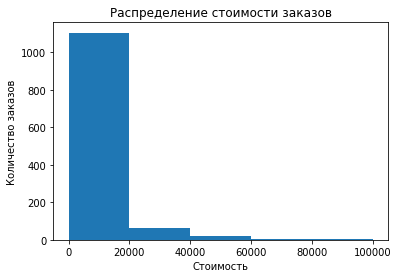

In [9]:
#Строим график распределения стоимости
plt.hist(orders['revenue'], bins=5, range=(1,100000))
plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость')
plt.ylabel('Количество заказов')
plt.show()

По графику можно видеть что подавляющее количество стоимости заказов не превышает 20 тысяч рублей, однако есть и аномально высокие значения, и для большей уверенности в этом рассчитаем перцентили.

In [10]:
#Рассчитываем выборку на перцентили
print('Не более 1% пользователей оформили заказ на сумму свыше', np.percentile(orders['revenue'], [99]),
     'Не более 5% пользователей оформили заказ на сумму cвыше', np.percentile(orders['revenue'], [95]),
     'Не более 10% пользователей оформили заказ на сумму свыше', np.percentile(orders['revenue'], [90])
     )

Не более 1% пользователей оформили заказ на сумму свыше [58233.2] Не более 5% пользователей оформили заказ на сумму cвыше [28000.] Не более 10% пользователей оформили заказ на сумму свыше [18168.]


Действительно, 95% пользователей осуществили покупку на сумму не более 28 тысяч рублей. Учтем этот момент при подготовке данных к анализу, и пойдем дальше

###### Подготовим данные

In [11]:
#Разделим посетителей на группы
#А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] #Кумулятивные данные по датам

#В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB'] #Кумулятивные данные по датам


#Разделим заказы на группы
#А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
] #Кумулятивные данные по датам
#В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
] #Кумулятивные данные по датам

#Совместим в одном датафрейме эти группы
df_group = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(df_group.head()) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Таким образом собран датафрейм с разбивкой на группы сырых данных без отсеивания аномалий, для дальнейшей работы с ними.

date — дата;  
ordersPerDateA — количество заказов в выбранную дату в группе A;  
revenuePerDateA — суммарная выручка в выбранную дату в группе A;  
ordersPerDateB — количество заказов в выбранную дату в группе B;  
revenuePerDateB — суммарная выручка в выбранную дату в группе B;  
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;  
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;  
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;  
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;  
visitorsPerDateA — количество пользователей в выбранную дату в группе A;  
visitorsPerDateB — количество пользователей в выбранную дату в группе B;  
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;  
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.  

###### Построим график кумулятивной выручки по группам

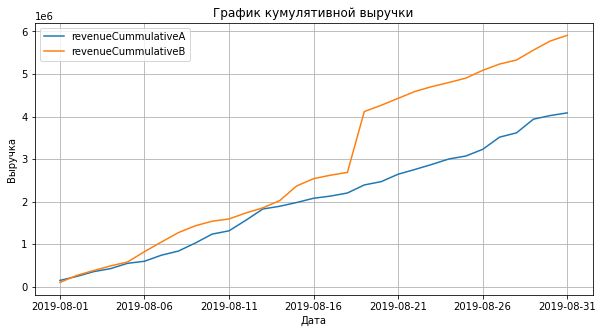

In [12]:
df_group[['date','revenueCummulativeA', 'revenueCummulativeB']].plot(x = 'date',
                  grid=True,  title = "График кумулятивной выручки", figsize=(10,5)).set(
                  xlabel = 'Дата', ylabel = 'Выручка');

<div style="border:solid green 2px; padding: 20px">
На графике видно что группа В имеет более высокие показатели нежели группа А. Ориентировочно 08.18 - 08.19 наблюдается резкий скачок показателя выручки у графика  В, предполагаю что это связано с крупным аномальным значением заказа который выявлен раннее. В свою очередь график А не имеет резких взлетов, стабильно двигаясь вверх.

###### Построим график кумулятивного среднего чека по группам

In [13]:
#Создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

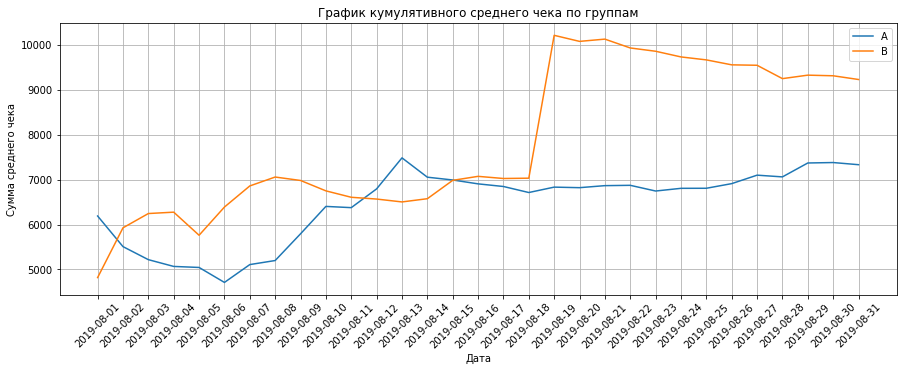

In [14]:
#Строим граифк
#Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.legend()
plt.xticks(rotation=45);

<div style="border:solid green 2px; padding: 20px">
Аналогично графику кумулятивной выручки, наблюдается резкий скачок суммы у группы В, по прежнему полагаю что это связано с аномальными значениями. Следует отметить что график идет на снижение после выброса.
График А стабилизировался после 08-17, и имеет стабильный рост.

###### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

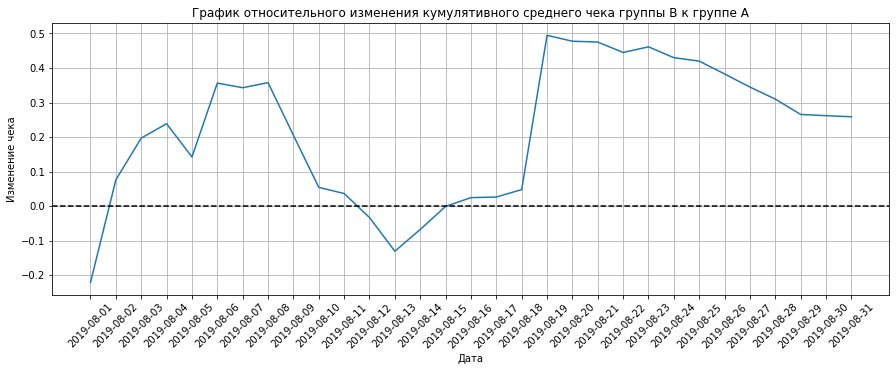

In [15]:
#Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Строим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение чека')
plt.xticks(rotation=45);

#Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

<div style="border:solid green 2px; padding: 20px">
В нескольких точках графика наблюдаются резкие скачки, это говорит о наличии выбросов в группе В относительно А.

###### Построим график кумулятивного среднего количества заказов на посетителя по группам

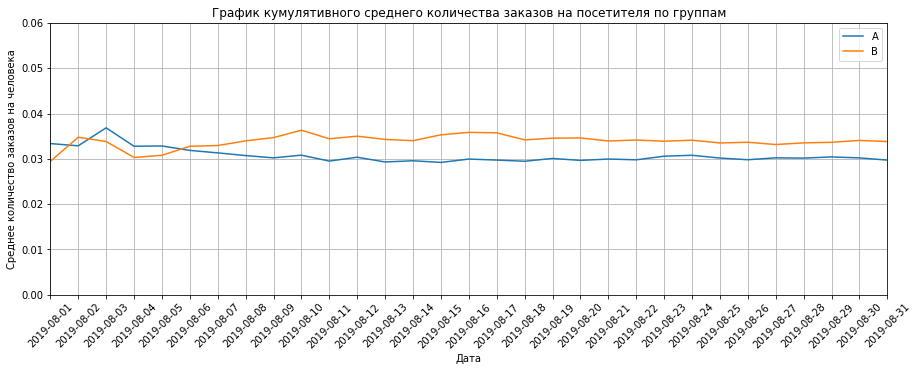

In [16]:
#Считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#Отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#Отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#Строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на человека')
plt.legend()

# задаем масштаб осей 
plt.axis(['2019-08-01', '2019-08-31', 0, 0.060])
plt.xticks(rotation=45);

<div style="border:solid green 2px; padding: 20px">
    Графики стабилизировались 08-10, и ровным фоном идут на протяжении всего интервала времени. Изначально группа А была выше показателем, но 08-05 произошло пересечение с группой В, которая в свою очередь вырвалась вперед путем увеличения среднего количества заказов на одного посетителя.

###### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

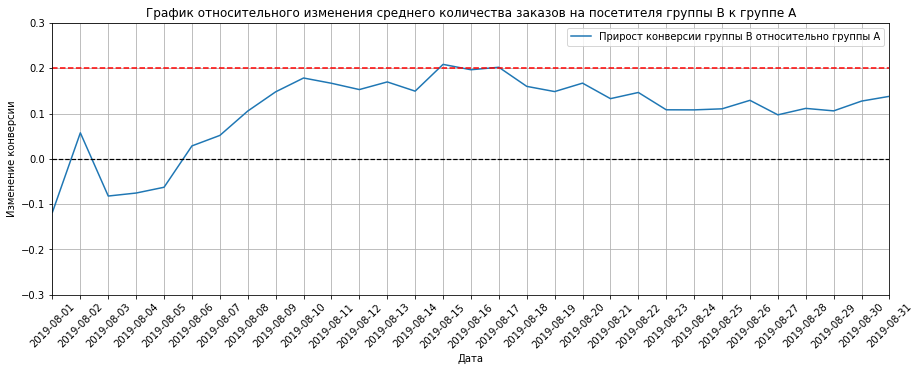

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--', linewidth=1.2)
plt.axhline(y=0.2, color='red', linestyle='--', linewidth=1.5)
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])
plt.title('График относительного изменения среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение конверсии')
plt.xticks(rotation=45);

<div style="border:solid green 2px; padding: 20px">
График стабилизировался. С начала теста группа В немного уступала группе А, но потом выровнялась в конверсии и имеет восходящую тенденцию

###### Построим точечный график количества заказов по пользователям

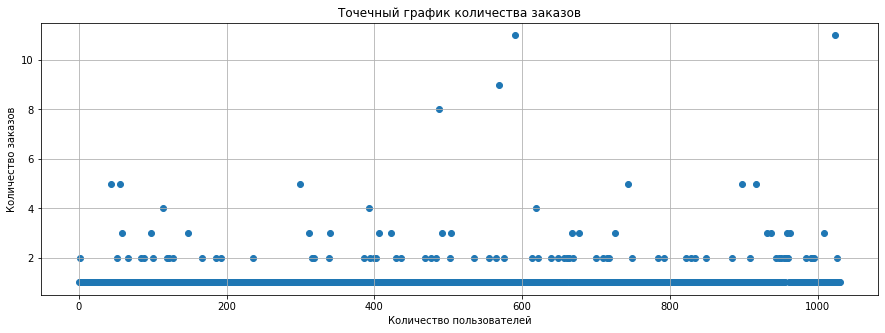

In [18]:
#Создадим датафрейм с заказами посетителей
transaction_visitors = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
transaction_visitors.columns = ['user_id','orders']
transaction_visitors.sort_values(by='orders',ascending=False).head(10)

#Строим точечный график
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график количества заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
x_values = pd.Series(range(0, len(transaction_visitors)))
plt.scatter(x_values, transaction_visitors['orders']);

<div style="border:solid green 2px; padding: 20px">
Подавляющее большинство людей делают 1 заказ, и многим меньше тех, кто делает 2 и 3 заказа. Количество заказов свыше трех считаю разумным убрать, дабы не искажать показатели

###### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [19]:
#95 и 99 перцентиль
print(np.percentile(transaction_visitors['orders'], [95, 99])) 

[2. 4.]


<div style="border:solid green 2px; padding: 20px">
    В процентном соотношении 5% покупателей сделали более 2х заказов, и 1% более 4х заказов, что и подтверждает предыдущий точечный график. 

###### Построим точечный график стоимостей заказов

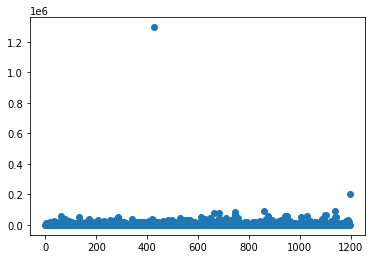

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Предлагаю все-таки избавиться от аномалий которые были обнаружены раннее. Нам уже известно что не более 5% покупателей оформили заказ стоимостью выше 28 тысяч рублей, считаю будет правильным ограничить выборку до этого значения, чтобы увидеть график информативным

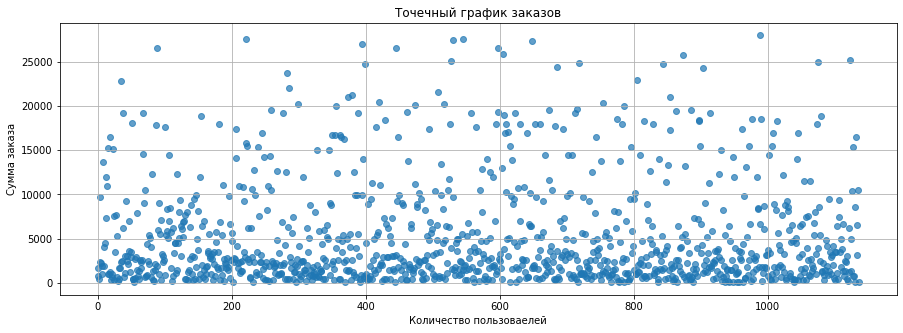

In [21]:
limit_orders = orders[orders['revenue']<=28000]['revenue']
x_values = pd.Series(range(0,len(limit_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график заказов')
plt.xlabel('Количество пользоваелей')
plt.ylabel('Сумма заказа')
plt.scatter(x_values, limit_orders, alpha=0.7);

<div style="border:solid green 2px; padding: 20px">
    Кажется я зря рассчитал перцентили в начале проекта увидев в выводе таблицы аномальное значение, нам уже известны цифры.
    Касаемо графика - что и требовалось доказать, подавляющее большинство людей делают покупки до 18-20 тысяч рублей, далее идут скорее единичные случаи

###### Посчитаем 95-й и 99-й перцентили стоимости заказов

Повторю раннее рассчитанные перцентили для удобства, и чтобы не сбить себя с последовательности действий :)

In [22]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<div style="border:solid green 2px; padding: 20px">
Получили те же значения что и раннее, не более 5% оформились на сумму более 28 тысяч, не более 1% на сумму более 58 тысяч

###### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сделаем проверку выборки критерием Манна-Уитни, и для этого подготовим данные. Т.к. я раннее уже сделал сборку данных, продолжу сразу со статистической значимости.

А так же сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [23]:
#Посчитаем статистическую значимость различия в среднем количестве заказов на посетителя между группами
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [24]:
#Создадим список из первой и второй части, чтобы потом объединить его
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_group['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

#Передадим список для объединения в переменные sampleA и sampleB, в которых пользователям из разных групп будет соответсвовать количество заказов
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_group['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_group['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

В sampleA сохранена выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Разделю сумму заказов на число пользователей — получу среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B.

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_group['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_group['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p_value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель В и А = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p_value = 0.017
Относительный показатель В и А = 0.138


<div style="border:solid green 2px; padding: 20px">
    По результату видно, что p_value меньше альфы (0.05), это говорит о том что различия в среднем количестве заказов есть, поэтому отвергаем нулевую гипотезу и берем альтернативную -  различия в среднем между группами есть. Относительный показатель прироста группы В к группе А = почти 14%

###### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Так же сформулируем гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [26]:
print('p_value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель В и А = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value = 0.729
Относительный показатель В и А = 0.259


<div style="border:solid green 2px; padding: 20px">
P-value превышает значение 0.05, это говорит о том что различий в среднем чеке по сырым данным между группами нет, поэтому принимаем нулевую гипотезу. Средний чек группы В больше группы А на 26%

###### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Чтобы очистить данные, учтем рассчитанные раннее перцентили среднего количества заказов (95% покупателей совершили более 2 заказов, 1% более 4х), и перцентили среднего чека заказов(не более 5% пользователей оформили заказ на сумму cвыше 28000, не более 1% пользователей оформили заказ на сумму свыше 58000).

In [27]:
#Узнаем, сколько всего аномальных пользователей
#Возьму значение количества заказов 3 и сумму 35 тысяч, чтобы не откинуть сильно много пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitor_id, dtype: int64
42


42 аномальных пользователей. Сделаем рассчет без их участия

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_group['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_group['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#Применим статистический критерий Манна-Уитни
print('p_value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель В и А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value = 0.014
Относительный показатель В и А = 0.155


<div style="border:solid green 2px; padding: 20px">
Результат практически не изменился, по прежнему отвергаем нулевую гипотезу и берем альтернативную - различия в среднем между группами есть.

###### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [29]:
print(
    'p_value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель В и А = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p_value = 0.874
Относительный показатель В и А = 0.025


<div style="border:solid green 2px; padding: 20px">
Результат изменился, но по прежнему различий в среднем чеке нет, соответственно нет повода для рассмотрения альтернативной гипотезы. А вот относительный показатель группы В к группе А теперь имеет всего 2.5%, что больше похоже на правду :)

###### Принятие решения по результатам теста

Исходя из проведения А/В теста, у нас имеются факты:

* Есть статистически значимое различие между группами А и В как по сырым данным, так и по очищенным от аномальных значений в пользу группы В.
* Различий в среднем чеке между группами А и В по сырым данным и по очищенным не наблюдается.
* Графики различия среднего количества заказов  между группами показывают, что значения группы В выше значений группы А.


Таким образом, мы выяснили что показатели группы А и группы В различаются в пользу группы В по признакам статистической значимости, среднего количества заказов на посетелителя по группам, и по графику кумулятивной выручки по группам.

Исходя из обнаруженных фактов, предлагаю остановить тест и признать его успешным. Продолжать тест дальше не имеет смысла, т.к. вероятность возвышения группы А над Б крайне мала, и возможно лишь по случайному стечению обстоятельств, например появление в этой группе крупных аномальных заказов (мы выяснили что это очень редкое явление), или же увеличение количества заказов, что так же является рандомным событием. Объявить группу В победителем по результатам проведенного А/В теста.